In [0]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files

The data for this exercise is available at: https://www.kaggle.com/datamunge/sign-language-mnist/home

Sign up and download to find 2 CSV files: sign_mnist_test.csv and sign_mnist_train.csv -- You will upload both of them using this button before you can continue.


In [2]:
uploaded=files.upload()

Saving sign_mnist_test.csv to sign_mnist_test.csv
Saving sign_mnist_train.csv to sign_mnist_train.csv


In [7]:
def get_data(filename):
    with open(filename) as training_file:
        reader = csv.reader(training_file, delimiter=',')    
        imgs = []
        labels = []

        next(reader, None)
        
        for row in reader:
            label = row[0]
            data = row[1:]
            img = np.array(data).reshape((28, 28))

            imgs.append(img)
            labels.append(label)

        images = np.array(imgs).astype(float)
        labels = np.array(labels).astype(float)
            
    return images, labels


training_images, training_labels = get_data('sign_mnist_train.csv')
testing_images, testing_labels = get_data('sign_mnist_test.csv')

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [8]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims

training_images = np.expand_dims(training_images, axis=3)
testing_images = np.expand_dims(testing_images, axis=3)

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(
    rescale=1 / 255
)
    
# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [20]:
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')
])

# Compile Model. 
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Configure generators
train_gen = train_datagen.flow(
    training_images,
    training_labels,
    batch_size=64
)

val_gen = validation_datagen.flow(
    testing_images,
    testing_labels,
    batch_size=64
)

# Train the Model
history = model.fit_generator(
    train_gen,
    epochs=20,
    validation_data=val_gen
)

model.evaluate(testing_images, testing_labels)
    
# Baseline
# [Loss, accuracy]
[6.92426086682151, 0.56609035]


Epoch 1/20
429/429 [==============================] - 30s 71ms/step - loss: 2.7243 - acc: 0.1733 - val_loss: 1.8855 - val_acc: 0.3819
Epoch 2/20
429/429 [==============================] - 30s 69ms/step - loss: 2.0115 - acc: 0.3671 - val_loss: 1.2088 - val_acc: 0.5891
Epoch 3/20
429/429 [==============================] - 30s 69ms/step - loss: 1.6337 - acc: 0.4754 - val_loss: 0.9783 - val_acc: 0.6645
Epoch 4/20
429/429 [==============================] - 30s 69ms/step - loss: 1.3853 - acc: 0.5536 - val_loss: 0.8322 - val_acc: 0.7086
Epoch 5/20
429/429 [==============================] - 30s 70ms/step - loss: 1.2017 - acc: 0.6061 - val_loss: 0.8883 - val_acc: 0.6814
Epoch 6/20
429/429 [==============================] - 30s 69ms/step - loss: 1.0712 - acc: 0.6457 - val_loss: 0.6686 - val_acc: 0.7552
Epoch 7/20
429/429 [==============================] - 30s 70ms/step - loss: 0.9472 - acc: 0.6900 - val_loss: 0.5140 - val_acc: 0.8115
Epoch 8/20
429/429 [==============================] - 30s 70ms

[6.92426086682151, 0.56609035]

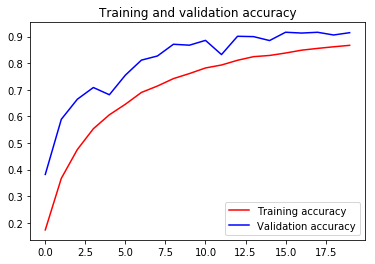

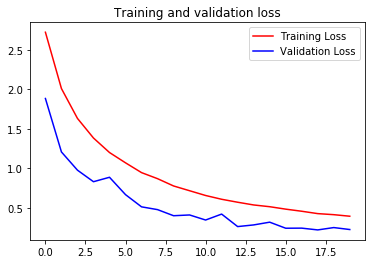

In [21]:
# Plot the chart for accuracy and loss on both training and validation

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()